In [51]:
import os
import pandas as pd

def list_patients(seg_path):
    Benign = []
    Malignant = []
    Patient_Path = []

    # Define the path to the 'train' subfolder in 'seg'
    train_path = os.path.join(seg_path, 'train')

    # Subdirectories we are interested in
    categories = ['images', 'labels']

    for category in categories:
        category_path = os.path.join(train_path, category)
        # print(category, os.listdir(category_path))
        if category == 'images':
            print('Images:', os.listdir(category_path))
            file_names = os.listdir(category_path)

            for file in file_names:
                patient_id = file.split('-')[-1]
                patient_type = file.split('-')[1]
                if patient_type == 'Be':
                    Benign.append(patient_id)
                else:
                    Malignant.append(patient_id)
                Patient_Path.append(category_path+ '\\' + file)

    return Benign, Malignant, Patient_Path

seg_path = 'data\\seg\\'
Benign, Malignant, patient_path = list_patients(seg_path)

# Create a dictionary with the lists
data = {'id': Benign + Malignant, 'type': ['Benign'] * len(Benign) + ['Malignant'] * len(Malignant), 'path': patient_path}

# Create the dataframe
df = pd.DataFrame(data)

# Print the dataframe
df.to_csv('patients.csv', index=False)

Images: ['BreaDM-Be-1801', 'BreaDM-Be-1803', 'BreaDM-Be-1804', 'BreaDM-Be-1805', 'BreaDM-Be-1806', 'BreaDM-Be-1807', 'BreaDM-Be-1808', 'BreaDM-Be-1809', 'BreaDM-Be-1811', 'BreaDM-Be-1812', 'BreaDM-Be-1814', 'BreaDM-Be-1816', 'BreaDM-Be-1817', 'BreaDM-Be-1818', 'BreaDM-Be-1819', 'BreaDM-Be-1820', 'BreaDM-Be-1821', 'BreaDM-Be-1823', 'BreaDM-Be-1824', 'BreaDM-Be-1825', 'BreaDM-Be-1827', 'BreaDM-Be-1828', 'BreaDM-Be-1829', 'BreaDM-Be-1830', 'BreaDM-Be-1831', 'BreaDM-Be-1901', 'BreaDM-Be-1902', 'BreaDM-Be-1903', 'BreaDM-Be-1904', 'BreaDM-Be-1908', 'BreaDM-Be-1910', 'BreaDM-Be-1911', 'BreaDM-Be-1912', 'BreaDM-Be-1913', 'BreaDM-Be-1915', 'BreaDM-Be-2003', 'BreaDM-Be-2004', 'BreaDM-Be-2006', 'BreaDM-Be-2007', 'BreaDM-Be-2008', 'BreaDM-Be-2009', 'BreaDM-Be-2010', 'BreaDM-Be-2011', 'BreaDM-Be-2012', 'BreaDM-Be-2014', 'BreaDM-Be-2015', 'BreaDM-Be-2016', 'BreaDM-Be-2017', 'BreaDM-Be-2018', 'BreaDM-Be-2021', 'BreaDM-Be-2023', 'BreaDM-Be-2101', 'BreaDM-Be-2103', 'BreaDM-Be-2104', 'BreaDM-Be-2106', '

In [52]:
pd.read_csv('patients.csv')

,id,type,path
0,1801,Benign,data\seg\train\images\BreaDM-Be-1801
1,1803,Benign,data\seg\train\images\BreaDM-Be-1803
2,1804,Benign,data\seg\train\images\BreaDM-Be-1804
3,1805,Benign,data\seg\train\images\BreaDM-Be-1805
4,1806,Benign,data\seg\train\images\BreaDM-Be-1806
...,...,...,...
161,2135,Malignant,data\seg\train\images\BreaDM-Ma-2135
162,2136,Malignant,data\seg\train\images\BreaDM-Ma-2136
163,2137,Malignant,data\seg\train\images\BreaDM-Ma-2137
164,2138,Malignant,data\seg\train\images\BreaDM-Ma-2138


In [53]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def get_random_patients(patients_csv):
    # Read the patient list from the CSV file
    patients_df = pd.read_csv(patients_csv)

    # Separate the patients into Benign and Malignant categories
    benign_patients = patients_df[patients_df['type'] == 'Benign']['id'].tolist()
    malignant_patients = patients_df[patients_df['type'] == 'Malignant']['id'].tolist()

    # Randomly select one patient from each category
    selected_benign_patient = random.choice(benign_patients)
    selected_malignant_patient = random.choice(malignant_patients)

    # Return the selected patients
    benign_patient_path = patients_df[patients_df['id'] == selected_benign_patient]['path'].values[0]
    malignant_patient_path = patients_df[patients_df['id'] == selected_malignant_patient]['path'].values[0]

    be = {
        "patient_id": selected_benign_patient,
        "patient_path": benign_patient_path
    }

    ma = {
        "patient_id": selected_malignant_patient,
        "patient_path": malignant_patient_path
    }

    return be, ma

In [73]:
def get_patient_images(patient_folder, patient_id, condition):
    # Define the path to the patient's folder
    if not patient_folder:
        raise ValueError(f"Patient folder for ID {patient_id} not found in {condition} condition.")

    # Subfolders inside the selected patient folder
    subfolders = ['SUB1', 'SUB2', 'SUB3', 'SUB4', 'SUB5', 'SUB6', 'SUB7', 'SUB8',
                  'VIBRANT', 'VIBRANT+C1', 'VIBRANT+C2', 'VIBRANT+C3', 'VIBRANT+C4', 
                  'VIBRANT+C5', 'VIBRANT+C6', 'VIBRANT+C7', 'VIBRANT+C8']

   # Specific subfolders we are interested in
    subfolders = ['SUB8', 'VIBRANT', 'VIBRANT+C8']

    # Collect the last image from each specified subfolder
    images = []
    for subfolder in subfolders:
        subfolder_path = os.path.join(patient_folder, subfolder)
        if os.path.exists(subfolder_path):
            jpg_files = sorted([f for f in os.listdir(subfolder_path) if f.endswith('.jpg')])
            if jpg_files:
                last_image = jpg_files[-1]
                images.append(os.path.join(subfolder_path, last_image))

    return images

In [86]:
def display_images(images, title, patient_id):

# Titles for each image
    image_titles = ["Subtraction Image", "Pre-contrast Image", "Post-contrast Image"]

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
    fig.suptitle(f"{title} (ID: {patient_id})", fontsize=20)

    for ax, img_path, img_title in zip(axes, images, image_titles):
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(img_title, fontsize=14)
        ax.axis('off')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5)
   
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

Selected Benign Patient: 2018
Selected Malignant Patient: 2102


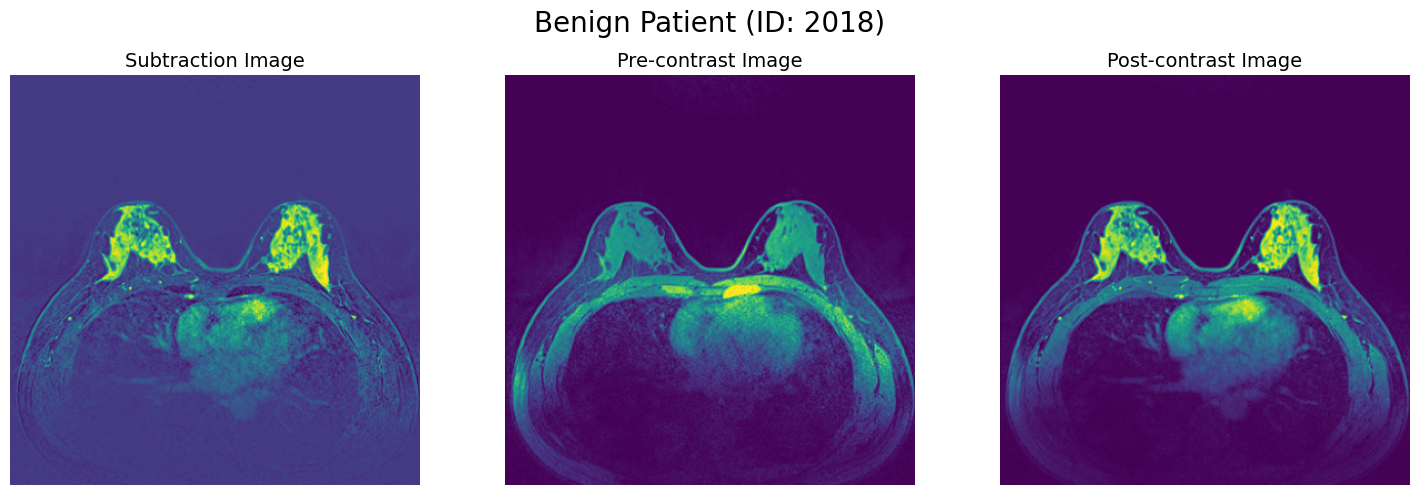

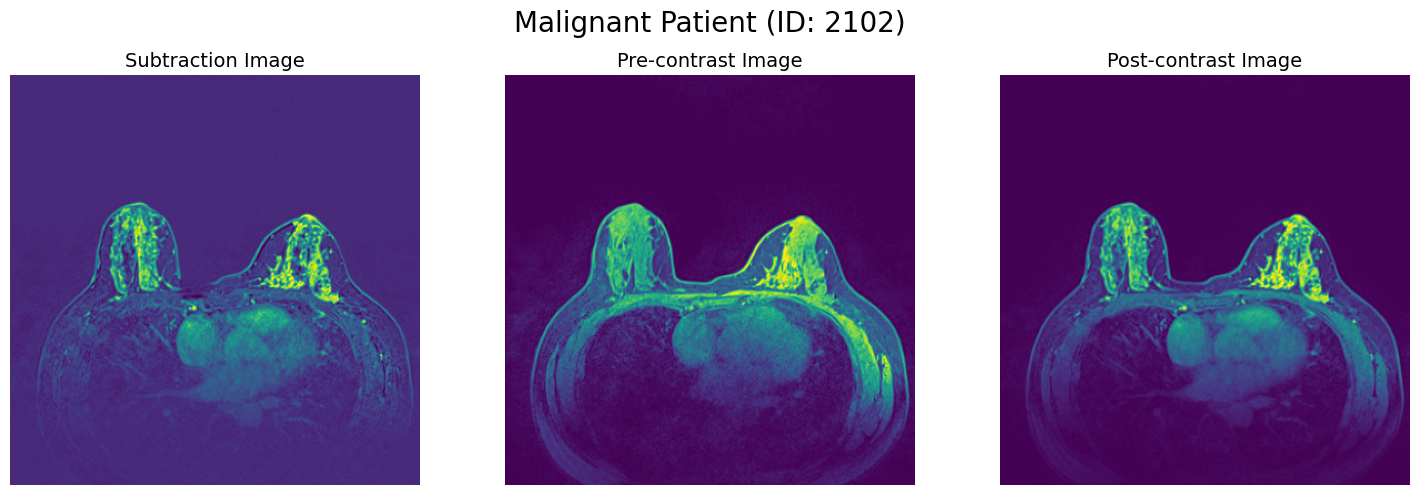

In [87]:
patients_csv = 'patients.csv'
benign_patient_dict, malignant_patient_dict = get_random_patients(patients_csv)

print('Selected Benign Patient:', benign_patient_dict['patient_id'])
print('Selected Malignant Patient:', malignant_patient_dict['patient_id'])

benign_patient_id = benign_patient_dict['patient_id']
malignant_patient_id = malignant_patient_dict['patient_id']

benign_patient_path = benign_patient_dict['patient_path']
malignant_patient_path = malignant_patient_dict['patient_path']

# Get images for the selected patients
benign_images = get_patient_images(benign_patient_path, benign_patient_id, 'Benign')
malignant_images = get_patient_images(malignant_patient_path, malignant_patient_id, 'Malignant')

# Display the images
display_images(benign_images, 'Benign Patient', benign_patient_id)
display_images(malignant_images, 'Malignant Patient', malignant_patient_id)